<a href="https://colab.research.google.com/github/PerfectMach1ne/uni-ai-ml/blob/main/wyklad6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Zdefiniowanie wymagań funkcjonalnych:**


*   dokonywanie predykcji dotyczącej kupna ubezpieczenia podróżnego na podstawie danych wpisanych do formularza przez użytkownika. Wyświetlona ma zostać odpowiedź oraz prawdopodobieństwo tej odpowiedzi.
*   zapisywanie wyników predykcji oraz danych podanych przez użytkownika do bazy danych




**Zdefiniowanie schematu bazy danych**
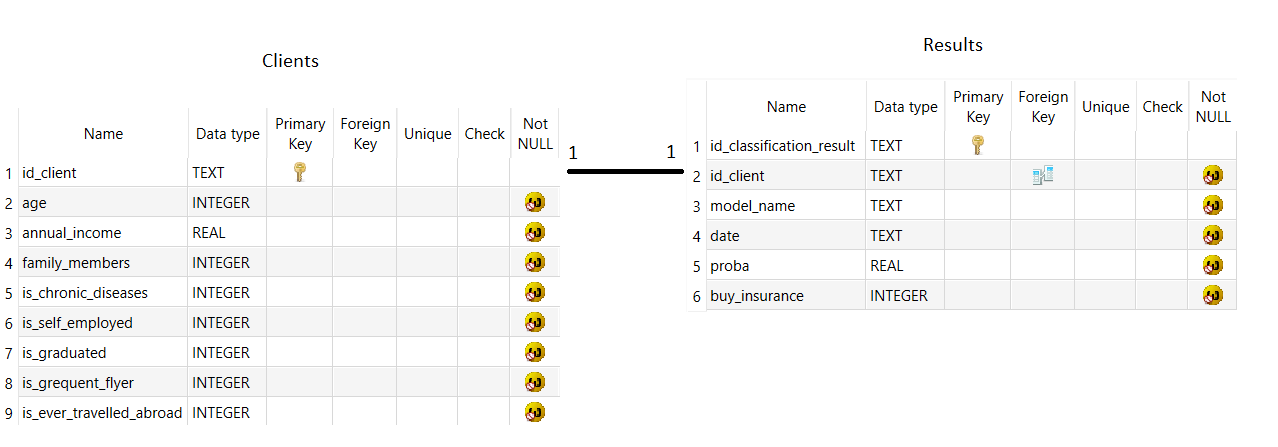

**Wybór technologii:**
*   frontend: PyQT5 (pip install pyqt5)
*   backend: Python
*   baza danych: SQLite

**Implementacja aplikacji:**
1. Stworzenie frontendu aplikacji (plik window.py)
2. Stworzenie schematu bazy danych (skrypt_baza.txt)


3. Podpięcie akcji do przycisku Submit
4. Pobranie wartości z formularza
5. Implementacja funkcji, która wczyta model z pliku
6. Implementacja funkcji, która dostanie dane pobrane z formularza oraz model i dokona predykcji
7. Wyświetlenie wyników predykcji w aplikacji
8. Implementacja funkcji do obsługi bazy danych
9. Zapis danych do bazy

**Przygotowanie pliku z modelem**

In [ ]:
import os
from pathlib import Path
import pandas as pd
current_path = Path(os.path.dirname(os.path.abspath("__file__")))

file_name="X.csv"
X=pd.read_csv(os.path.join(current_path,file_name))

file_name="y.csv"
y=pd.read_csv(os.path.join(current_path,file_name))

In [ ]:
X.columns

Index(['Age', 'AnnualIncome', 'FamilyMembers', 'ChronicDiseases',
       'Employment Type_Private Sector/Self Employed', 'GraduateOrNot_Yes',
       'FrequentFlyer_Yes', 'EverTravelledAbroad_Yes'],
      dtype='object')

In [ ]:
dict_column_names={'Age': "age", "AnnualIncome": "annual_income", "FamilyMembers":"family_members", "ChronicDiseases" :"is_chronic_diseases",
                   "Employment Type_Private Sector/Self Employed": "is_self_employed", "GraduateOrNot_Yes": "is_graduated",
                   "FrequentFlyer_Yes":"is_frequent_flyer", "EverTravelledAbroad_Yes": "is_ever_travelled_abroad"}

In [ ]:
#zmiana nazwy kolumn
X=X.rename(columns=dict_column_names)

In [ ]:
X.columns

Index(['age', 'annual_income', 'family_members', 'is_chronic_diseases',
       'is_self_employed', 'is_graduated', 'is_frequent_flyer',
       'is_ever_travelled_abroad'],
      dtype='object')

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#trening
class_rf = RandomForestClassifier(class_weight="balanced")
class_rf.fit(X, y.values.ravel())

RandomForestClassifier(class_weight='balanced')

In [ ]:
import pickle
from datetime import datetime
path_to_save="model_RF.pickle"
model={"model":class_rf, "name":"RandomForest"+datetime.now().strftime("%d/%m/%Y %H:%M:%S")}
with open(os.path.join(current_path,path_to_save), 'wb') as model_file:
  pickle.dump(model, model_file)